In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score

In [67]:
import sklearn
print(sklearn.__version__)

1.2.2


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
from imblearn.over_sampling import SMOTE
import pickle

In [70]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/model/'

In [71]:
RANDOM_STATE = 39

In [72]:
data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/WineQT.csv")

In [73]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [74]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [75]:
data_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [76]:
data_df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [77]:
data_df.drop(["Id"], axis = 1, inplace = True)

In [78]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


[Text(0, 0, '6'),
 Text(0, 0, '33'),
 Text(0, 0, '483'),
 Text(0, 0, '462'),
 Text(0, 0, '143'),
 Text(0, 0, '16')]

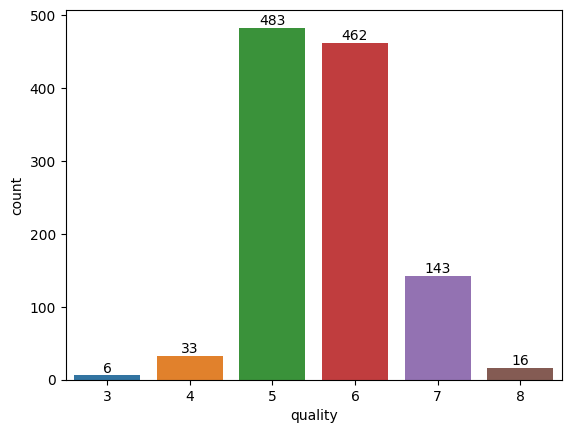

In [79]:
ax = sns.countplot(x = "quality", data = data_df)
ax.bar_label(ax.containers[0])

We can see from above plot, that the data is highly imbalanced. So, we are going to merge the data of quality 3 and quality 4. Also quality 7 and 8 will me merged.

In [80]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [81]:
def wineQualityTransform(quality):
    wine_quality_transformation = {3: 0, 4: 0, 5:1, 6:2, 7: 3, 8: 3}
    return wine_quality_transformation[quality]

data_df["quality"] = data_df["quality"].apply(wineQualityTransform)
print(data_df.quality.value_counts())


1    483
2    462
3    159
0     39
Name: quality, dtype: int64


[Text(0, 0, '39'), Text(0, 0, '483'), Text(0, 0, '462'), Text(0, 0, '159')]

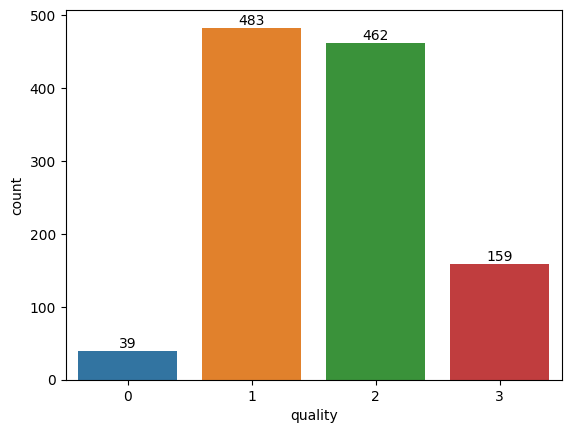

In [82]:
ax = sns.countplot(x = "quality", data = data_df)
ax.bar_label(ax.containers[0])

So, we still have highly imbalanced data. For the handling of imbalanced data, we are going to use various methods like oversampling, undersampling, smote and class weights.

In [83]:
from sklearn.model_selection import train_test_split

X = data_df.drop("quality", axis = 1)
y = data_df.quality

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify = y)

In [84]:
train_df = pd.concat([X_train, y_train], axis = 1)
train_df.to_csv(model_path + 'train_df.csv')

In [85]:
test_df = pd.concat([X_test, y_test], axis = 1)  
test_df.head()
test_df.to_csv(model_path + "test_df.csv")

In [86]:
def qualityBarplot(qualitySeries):
    count_calc = qualitySeries.value_counts()
    print(count_calc)
    f, ax = plt.subplots(1, 1, figsize = (10, 5))
    g = sns.barplot(x = count_calc.index, y = count_calc, ax = ax)
    g.set(xlabel = "quality", ylabel = "count")
    g.bar_label(g.containers[0])

1    386
2    370
3    127
0     31
Name: quality, dtype: int64
1    97
2    92
3    32
0     8
Name: quality, dtype: int64


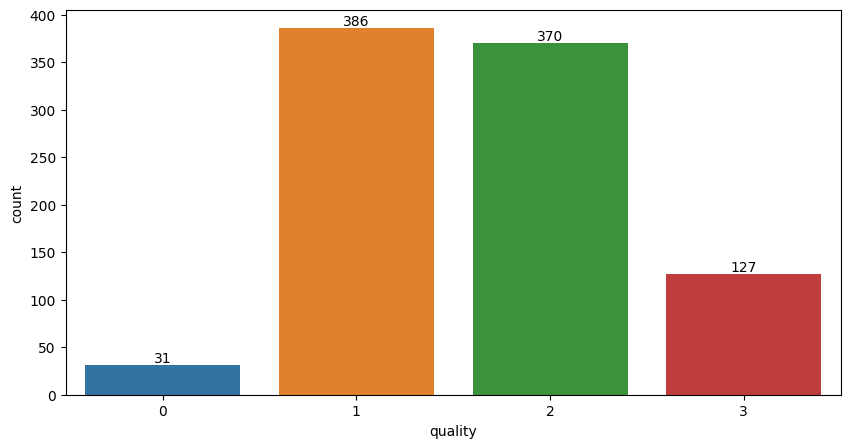

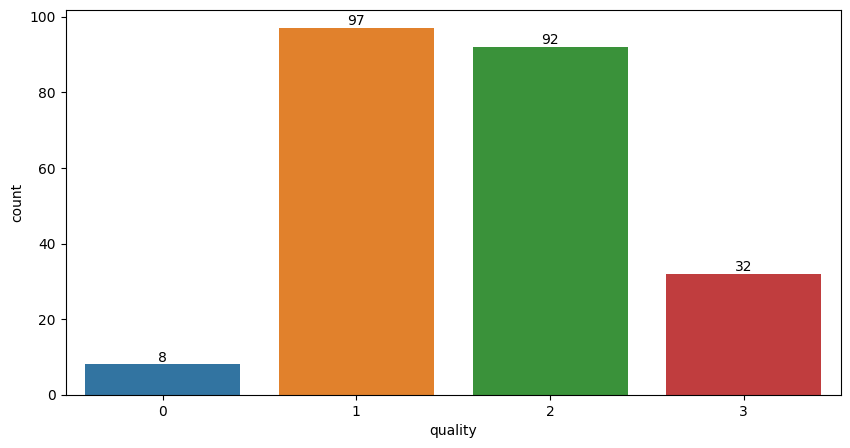

In [87]:
qualityBarplot(y_train)
qualityBarplot(y_test)

In [88]:
y_train

896     2
651     1
813     3
94      1
1065    1
       ..
885     1
666     3
144     2
592     3
257     1
Name: quality, Length: 914, dtype: int64

## Logistic Regression

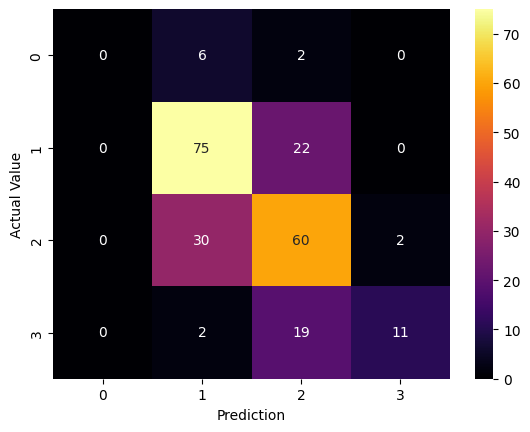


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.66      0.77      0.71        97
           2       0.58      0.65      0.62        92
           3       0.85      0.34      0.49        32

    accuracy                           0.64       229
   macro avg       0.52      0.44      0.45       229
weighted avg       0.63      0.64      0.62       229



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
logreg = LogisticRegression(multi_class='multinomial', solver = 'newton-cg', random_state=RANDOM_STATE)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [90]:
fileName = "lr_1.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(logreg, f)

## Logistic Regression after the application of standard scaler and log transformation

In [91]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
896,10.4,0.430,0.50,2.3,0.068,13.0,19.0,0.99600,3.10,0.87,11.40
651,9.6,0.410,0.37,2.3,0.091,10.0,23.0,0.99786,3.24,0.56,10.50
813,10.0,0.410,0.45,6.2,0.071,6.0,14.0,0.99702,3.21,0.49,11.80
94,7.2,0.415,0.36,2.0,0.081,13.0,45.0,0.99720,3.48,0.64,9.20
1065,6.2,0.650,0.06,1.6,0.050,6.0,18.0,0.99348,3.57,0.54,11.95
...,...,...,...,...,...,...,...,...,...,...,...
885,7.9,0.660,0.00,1.4,0.096,6.0,13.0,0.99569,3.43,0.58,9.50
666,8.3,0.300,0.49,3.8,0.090,11.0,24.0,0.99498,3.27,0.64,12.10
144,7.0,0.430,0.36,1.6,0.089,14.0,37.0,0.99615,3.34,0.56,9.20
592,7.5,0.270,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.00


In [92]:
log_X_train = np.log(X_train + 0.001)

scaler = StandardScaler()
scaler.fit(log_X_train)

StandardScaler()

In [93]:
fileName = "scaler_2.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(scaler, f)

In [94]:
def scaleAndTransform(data, scaler):
  log_data = np.log(data + 0.01)
  return scaler.transform(log_data)

In [95]:
X_train_transformed = scaleAndTransform(X_train, scaler)
X_test_transformed = scaleAndTransform(X_test, scaler)

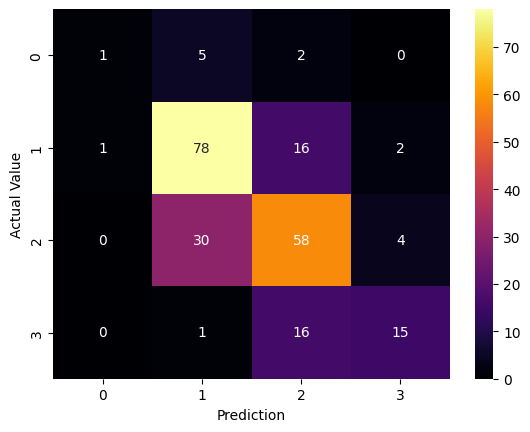


              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.68      0.80      0.74        97
           2       0.63      0.63      0.63        92
           3       0.71      0.47      0.57        32

    accuracy                           0.66       229
   macro avg       0.63      0.51      0.53       229
weighted avg       0.66      0.66      0.65       229



In [114]:
logreg = LogisticRegression(multi_class='multinomial', solver = 'newton-cg', random_state=RANDOM_STATE)
logreg.fit(X_train_transformed, y_train)


y_pred = logreg.predict(X_test_transformed)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [115]:
print(f1_score(y_true = y_test, y_pred = y_pred, average = "micro"))
print(f1_score(y_true = y_test, y_pred = y_pred, average = "macro"))
print(f1_score(y_true = y_test, y_pred = y_pred, average = "weighted"))

0.6637554585152838
0.5339522528371868
0.6525277177187614


In [97]:
fileName = "lr_2.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(logreg, f)

In [98]:
y_test

83      1
853     3
133     1
1012    1
145     3
       ..
842     3
88      1
838     1
545     1
626     2
Name: quality, Length: 229, dtype: int64

In [99]:
## Use for the custom data
with open(model_path + 'scaler_2.pkl', 'rb') as f:
  scaler2 = pickle.load(f)

with open(model_path + 'lr_2.pkl', 'rb') as f:
  lr2 = pickle.load(f)

custom_data = X_test.iloc[1].values
print(custom_data)
custom_data = np.expand_dims(custom_data, axis = 0)
scaled_custom_data = scaleAndTransform(custom_data, scaler2)
print(scaled_custom_data)
custom_data_pred = lr2.predict_proba(scaled_custom_data) 
print("Prediction : ")
print(custom_data_pred)


[ 7.2      0.36     0.46     2.1      0.074   24.      44.       0.99534
  3.4      0.85    11.     ]
[[-0.61272691 -0.85953981  0.71171384 -0.28708912  0.07796038  0.93817668
   0.27575769  3.93345486  0.64276035  1.30506116  0.56807529]]
Prediction : 
[[0.00541018 0.10785223 0.56647969 0.3202579 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


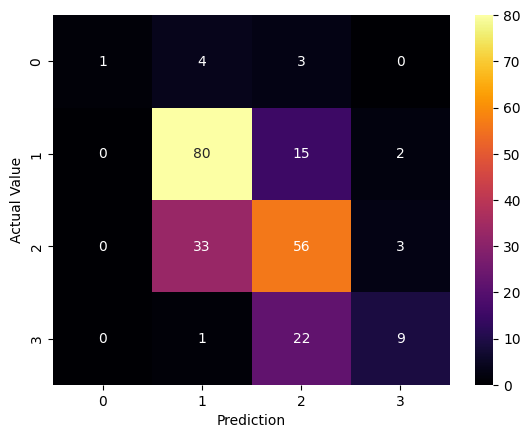


              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.68      0.82      0.74        97
           2       0.58      0.61      0.60        92
           3       0.64      0.28      0.39        32

    accuracy                           0.64       229
   macro avg       0.73      0.46      0.49       229
weighted avg       0.65      0.64      0.62       229



In [117]:
logreg = LogisticRegression(multi_class='ovr', solver = 'newton-cg', random_state=RANDOM_STATE)
logreg.fit(X_train_transformed, y_train)

y_pred = logreg.predict(X_test_transformed)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [119]:
print(f1_score(y_true = y_test, y_pred = y_pred, average = "micro"))
print(f1_score(y_true = y_test, y_pred = y_pred, average = "macro"))
print(f1_score(y_true = y_test, y_pred = y_pred, average = "weighted"))

0.6375545851528385
0.48836432435275023
0.6170046902102111


## Use SMOTE for handling class imbalanced

In [121]:
y_train.value_counts()

1    386
2    370
3    127
0     31
Name: quality, dtype: int64

In [122]:
sm = SMOTE(random_state = RANDOM_STATE)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [123]:
y_res.value_counts()

2    386
1    386
3    386
0    386
Name: quality, dtype: int64

In [124]:
log_X_train = np.log(X_res + 0.001)

scaler2 = StandardScaler()
scaler2.fit(log_X_train)

StandardScaler()

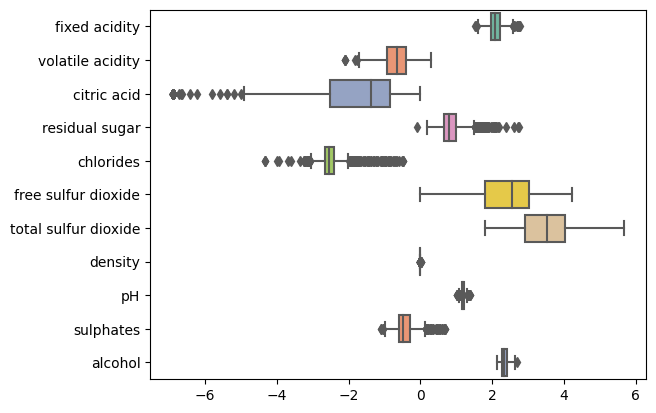

In [125]:
log_X_train = np.log(X_res + 0.001)
sns.boxplot(data=log_X_train, orient="h", palette="Set2")
plt.show()

In [126]:
X_train_transformed = scaleAndTransform(X_res, scaler2)
X_test_transformed = scaleAndTransform(X_test, scaler2)

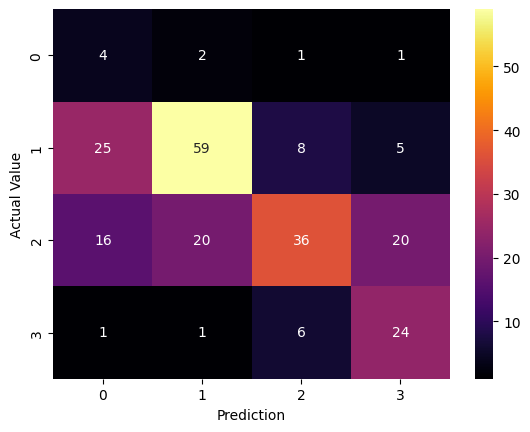


              precision    recall  f1-score   support

           0       0.09      0.50      0.15         8
           1       0.72      0.61      0.66        97
           2       0.71      0.39      0.50        92
           3       0.48      0.75      0.59        32

    accuracy                           0.54       229
   macro avg       0.50      0.56      0.47       229
weighted avg       0.66      0.54      0.57       229


0.537117903930131
0.4740570955995401
0.5684834275203012


In [129]:
logreg = LogisticRegression(multi_class='multinomial', solver = 'newton-cg', random_state=RANDOM_STATE)
logreg.fit(X_train_transformed, y_res)


y_pred = logreg.predict(X_test_transformed)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

print()
print(f1_score(y_true = y_test, y_pred = y_pred, average = "micro"))
print(f1_score(y_true = y_test, y_pred = y_pred, average = "macro"))
print(f1_score(y_true = y_test, y_pred = y_pred, average = "weighted"))